# Sobre o notebook

Aproveite esse espaço para as atividades do curso de Data Visualization: gráficos de composição e relacionamento da Alura. Aqui você pode escrever e testar os códigos dos diversos desafios envolvendo os aprendizados de cada aula.

Este notebook foi construído com espaço para as células dos desafios propostos no curso, com ele você tem espaço para construir e executar suas soluções


## Paleta de Cores

Vamos compartilhar aqui a paleta de cores que usamos durante o curso pra você executar e usar em seu projeto, mas sinta-se livre para construir a sua propria.

In [317]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, CINZA6, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#DEE2E6', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7',	'#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040',	'#9ABB59', '#9ECCB3'

In [318]:
# Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np

## Aula 01 - Proporção dos dados

### Desafio 1

##### Como estão dispostos os valores agregados de serviços por região do Brasil no ano de 2018?



In [319]:
df_pib = pd.read_csv(
    r'C:\Estudos\alura\data-science\11-dataviz\dados\pib_br_2002_2020_estados.csv'
)

In [320]:
df_pib

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,RO,Norte,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,RO,Norte,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,RO,Norte,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199
3,2005,RO,Norte,12511821181,1476144194,11035676990,1342222120,1887932121,4603783904,3201738843
4,2006,RO,Norte,13054713344,1613809974,11440903374,1238006193,2210692147,4320526746,3671678293
...,...,...,...,...,...,...,...,...,...,...
508,2016,DF,Centro-Oeste,235540044811,29145619376,206394425435,820754661,9662357225,103859865830,92051447720
509,2017,DF,Centro-Oeste,244722249337,29120461647,215601787690,828313642,8448768236,108322119432,98002586380
510,2018,DF,Centro-Oeste,254817204692,28692287369,226124917323,1022690641,9541298290,113768086938,101792841454
511,2019,DF,Centro-Oeste,273613711477,30686607647,242927103829,992393584,9453608031,125261853488,107219248727


In [321]:
df_servico = df_pib.copy(deep=True) # Cria uma cópia profunda
df_servico_2018 = df_servico.query('ano == 2018') # Separa o ano de 2018
df_servico_2018 = df_servico_2018[['regiao', 'va_servicos']] # Variáveis de interesse
df_servico_2018 = df_servico_2018.groupby(by='regiao').agg('sum') # Faz o agrupamento
df_servico_2018

,va_servicos
regiao,
Centro-Oeste,296250896281
Nordeste,433449662991
Norte,133394247965
Sudeste,1933221862566
Sul,546627330178


In [322]:
config = {'size': 12, 'fontweight': 'bold', 'color': r'#ffffff'}

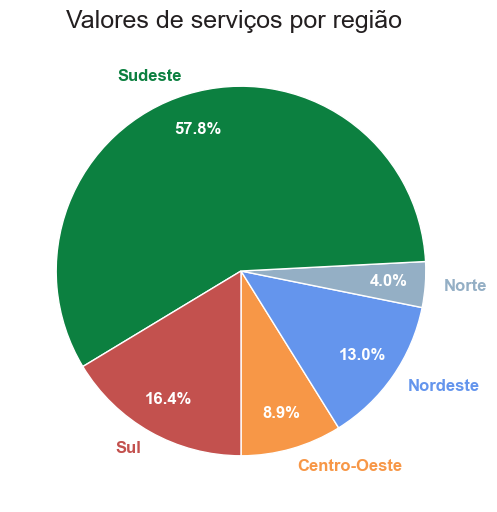

In [323]:
sns.set_style('white')

fig, ax = plt.subplots(figsize=(6, 6))

cores = [LARANJA1, AZUL3, AZUL5, VERDE1, VERMELHO1]

plt.suptitle('Valores de serviços por região', fontsize=18, color=CINZA1, y=0.93)

# Gráfico

ptc, text, _ = ax.pie(data=df_servico_2018, x='va_servicos',
                      labels=df_servico_2018.index,
                      autopct=r'%.1f%%', pctdistance=0.8,
                      colors=cores, textprops=config,
                      startangle=270)

for i, p in enumerate(ptc):
    text[i].set_color(p.get_facecolor())

### Desafio 2

#### Qual a participação da Região Norte nos valores agregados da indústria de todo Brasil nos anos de 2010 e 2020? Podemos notar algum comportamento?

In [324]:
df_industria_2010, df_industria_2020 = df_pib.query(
    'ano == 2010'
), df_pib.query(
    'ano == 2020'
) 

df_industria_2010 = df_industria_2010[['regiao', 'va_industria']]
df_industria_2020 = df_industria_2020[['regiao', 'va_industria']]

df_industria_2010.loc[df_industria_2010['regiao'] != 'Norte', 'regiao'] = 'Outros'
df_industria_2020.loc[df_industria_2020['regiao'] != 'Norte', 'regiao'] = 'Outros'

df_industria_2010 = df_industria_2010.rename(columns={'regiao': 'Região',
                                                      'va_industria': 'Valor Indústria'})
df_industria_2020 = df_industria_2020.rename(columns={'regiao': 'Região',
                                                      'va_industria': 'Valor Indústria'})

df_industria_2010 = df_industria_2010.groupby(by='Região').agg('sum')
df_industria_2020 = df_industria_2020.groupby(by='Região').agg('sum')

display(df_industria_2010, df_industria_2020)

,Valor Indústria
Região,
Norte,58665438171
Outros,845492561850


,Valor Indústria
Região,
Norte,137740478879
Outros,1346596521109


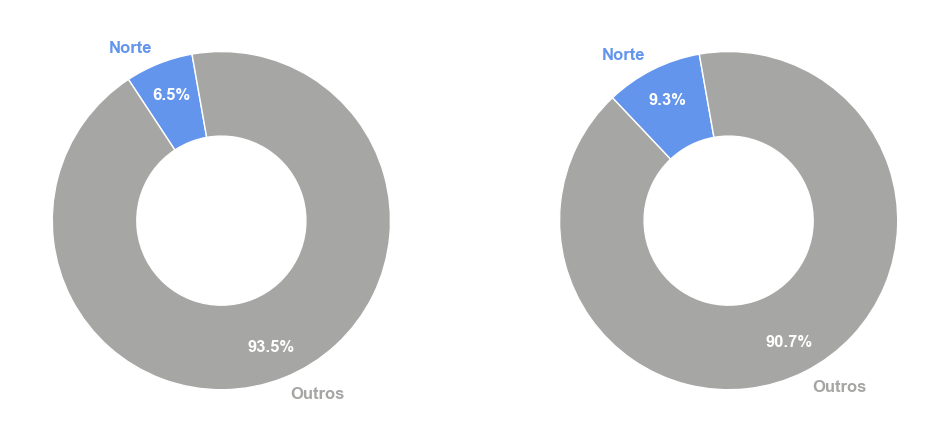

In [325]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1

ptc, text, _ = axs[0].pie(data=df_industria_2010, x='Valor Indústria',
           labels=df_industria_2010.index, autopct=r'%.1f%%',
           startangle=100, pctdistance=0.8, wedgeprops=dict(width=0.5),
           textprops=dict(size=12, fontweight='bold', color=BRANCO),
           colors=[AZUL3, CINZA4])

for i, p in enumerate(ptc):
    text[i].set_color(p.get_facecolor())

# Gráfico 2

ptc, text, _ = axs[1].pie(data=df_industria_2020, x='Valor Indústria',
           labels=df_industria_2020.index, autopct=r'%.1f%%',
           startangle=100, pctdistance=0.8, wedgeprops=dict(width=0.5),
           textprops=dict(size=12, fontweight='bold', color=BRANCO),
           colors=[AZUL3, CINZA4])

for i, p in enumerate(ptc):
    text[i].set_color(p.get_facecolor())

sns.despine(bottom=True, top=True, right=True, left=True)

plt.show()

#### `Resposta`: É possivel notar que a porção da região norte em relação ao todo aumentou.

## Aula 02 - Compondo dados estáticos

### Desafio 1

#### Como está composto o PIB do Estado de São Paulo em 2020 partindo do valor agregado bruto dos bens e serviços produzidos e os impostos líquidos?

In [326]:
sp = df_pib.query("sigla_uf == 'SP' and ano == 2020")[[
    'pib', 'impostos_liquidos', 'va'
]]

sp = sp.rename(columns={'pib': 'PIB',
                   'impostos_liquidos': 'Impostos Líquidos',
                   'va': 'Valor Adicionado Bruto'})

sp = sp.melt(var_name='Indicadores', value_name='Valores')

sp.loc[
    sp['Indicadores'] == 'Impostos Líquidos', 'Valores'
] = sp['Valores'] * (-1)

sp

,Indicadores,Valores
0,PIB,2377638979835
1,Impostos Líquidos,-362788671543
2,Valor Adicionado Bruto,2014850308310


In [327]:
sp['Valores_str'] = (sp['Valores'] / 1e12).map('R$ {:,.2f} Tri'.format)
sp['Medidas'] = ['absolute', 'relative', 'total']
sp

,Indicadores,Valores,Valores_str,Medidas
0,PIB,2377638979835,R$ 2.38 Tri,absolute
1,Impostos Líquidos,-362788671543,R$ -0.36 Tri,relative
2,Valor Adicionado Bruto,2014850308310,R$ 2.01 Tri,total


In [333]:
fig = go.Figure(go.Waterfall(name='', orientation='v', measure=sp['Medidas'],
                             x=sp['Indicadores'], y=sp['Valores'],
                             textposition='inside',
                             connector_line={'color': CINZA3},
                             totals_marker={'color': AZUL3},
                             decreasing_marker={'color': VERMELHO1}))

fig.update_layout(width=800, height=500, font_family='DejaVu Sans',
                  font_size=15, font=dict(color='black'), title_font_color=CINZA1,
                  title_font_size=24, title_text='Distribuição do Produto interno Bruto (PIB) de São Paulo em 2020' + 
                  '<br><sup size=1 style="color:#555655">Impostos líquidos e Valores' + ' Adicionados Brutos de bens e serviços (em trilhões de reais)</sup>', plot_bgcolor=BRANCO,
                  hovermode='closest')

fig.add_annotation(x=sp['Indicadores'][0], y=sp['Valores'][0],
                   text=sp['Valores_str'][0], showarrow=False,
                   xanchor='center', yanchor='top',
                   font=dict(color='white'))

fig.add_annotation(x=sp['Indicadores'][1], y=sp['Valores'][0],
                   text=sp['Valores_str'][1], showarrow=False,
                   xanchor='center', yanchor='top',
                   font=dict(color='white'))

fig.add_annotation(x=sp['Indicadores'][2], y=sp['Valores'][2],
                   text=sp['Valores_str'][2], showarrow=False,
                   xanchor='center', yanchor='top',
                   font=dict(color='white'))

fig.add_annotation(text='Fonte dos dados: <a href="https://sidra.ibge.gov.br/pesquisa/pib-munic/tabelas">Produto Interno Bruto | IBGE</a>',
                   align="left", xref="paper", yref = "paper", x=1, y=-0.2, showarrow=False)

fig.update_yaxes(showticklabels=False)

fig.show()

### Desafio 2

#### Qual a evolução anual do valor agregado de serviços na Região Nordeste entre os anos de 2016 a 2020?

In [329]:
anos = [x for x in range(2016, 2020 + 1)]

nordeste = df_pib.query(
    "regiao == 'Nordeste' and ano == @anos"
)[['ano', 'va_servicos']].groupby(by='ano').agg('sum').reset_index(drop=False)

nordeste

,ano,va_servicos
0,2016,391149062027
1,2017,413890511671
2,2018,433449662991
3,2019,450661680677
4,2020,436102799877


In [330]:
nordeste['variacao_va'] = nordeste['va_servicos'].diff().fillna(
    nordeste['va_servicos']
).astype('Int64')

nordeste['Medidas'] = ['absolute'] + ['relative'] * 4

nordeste

,ano,va_servicos,variacao_va,Medidas
0,2016,391149062027,391149062027,absolute
1,2017,413890511671,22741449644,relative
2,2018,433449662991,19559151320,relative
3,2019,450661680677,17212017686,relative
4,2020,436102799877,-14558880800,relative


In [331]:
atualizacao = pd.Series({'ano': 'Total',
                         'va_servicos': nordeste['va_servicos'].values[-1],
                         'variacao_va': nordeste['va_servicos'].values[-1],
                         'Medidas': 'total'}).to_frame().T

nordeste = pd.concat([nordeste, atualizacao],
                     axis=0, ignore_index=True)

nordeste = nordeste.drop(columns=['va_servicos'])

nordeste['variacao_va_texto'] = (nordeste['variacao_va']/1e9).map(
    'R$ {:,.2f} Bi'.format
)

nordeste = nordeste.rename(
    columns={'ano': 'Ano', 'variacao_va': 'Variação do VA',
             'variacao_va_texto': 'Variação do VA (em texto)'})

nordeste

,Ano,Variação do VA,Medidas,Variação do VA (em texto)
0,2016,391149062027,absolute,R$ 391.15 Bi
1,2017,22741449644,relative,R$ 22.74 Bi
2,2018,19559151320,relative,R$ 19.56 Bi
3,2019,17212017686,relative,R$ 17.21 Bi
4,2020,-14558880800,relative,R$ -14.56 Bi
5,Total,436102799877,total,R$ 436.10 Bi


In [336]:
fig = go.Figure(
    go.Waterfall(name='', orientation='v', measure=nordeste['Medidas'],
                 y=nordeste['Variação do VA'], text=nordeste['Variação do VA (em texto)'],
                 textposition='outside', connector_line=dict(color=CINZA3),
                 totals_marker=dict(color=AZUL3),
                 increasing_marker=dict(color=VERDE1),
                 decreasing_marker=dict(color=VERMELHO1))
)

fig.update_layout(width=1000, height=600, font_family='DejaVu Sans',
                  font_size=15, font_color=CINZA2, title_font_color=CINZA1,
                  title_font_size=24,
                  title_text='Variação do VA do Nordeste<br>De 2010 a 2020 (em bilhões de reais)',
                  plot_bgcolor=BRANCO)

fig.update_yaxes(showticklabels=False)

fig.update_xaxes(tickmode='array', tickvals=np.arange(0, 6),
                 ticktext=nordeste['Ano'])

fig.update_traces(hovertemplate='<b>%{x}</b> = %{text}')

fig.show()

## Aula 03 - Compondo dados dinâmicos

### Desafio 1

### Desafio 2

## Aula 04 - Investigando a variação dos dados

### Desafio 1

### Desafio 2

## Aula 05 - Relacionando dados

### Desafio 1

### Desafio 2